#House Sales King County USA


King County is a county located in the U.S. state of Washington. The population was 2,233,163 in the 2018 census estimate. King is the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, which is the state's largest city.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#About this File
21 house features plus the price and the id columns, along with 21613 observations.
## Coulmns Description
id-a notation for a house

date-Date house was sold

price-Price is prediction target

bedrooms-Number of Bedrooms/House

bathrooms-
Number of bathrooms/House

sqft_living-
square footage of the home

sqft_lot-
square footage of the lot

floors-
Total floors (levels) in house

waterfront-
House which has a view to a waterfront

view-
Has been viewed

condition-
How good the condition is ( Overall )

grade-
overall grade given to the housing unit, based on King County grading system

sqft_above-
square footage of house apart from basement

sqft_basement-
square footage of the basement

yr_built-
Built Year

yr_renovated-
Year when house was renovated

zipcode-
zip

lat-
Latitude coordinate

long-
Longitude coordinate

sqft_living15-
Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15-
lotSize area in 2015(implies-- some renovations)




#Data Description

In [208]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
df=pd.read_csv("https://raw.githubusercontent.com/AyanChawla/House-sales-dataset/master/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.shape

(21613, 21)

In [0]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


The describe function doesn't make sense on some coulmns like id,zipcode,lat,long.

So we have to remove those


In [189]:
df.drop(['id','zipcode',	'lat',	'long'],axis=1).describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000


Are there any NULL values


#Data Preparation

In [203]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

It is clear that there are **no NULL** values . Hnece we are ready to proceed further

Another way to check **NULL** values

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


First Let us check Are there any **anomalies** in the dataset or not??

In [0]:
df.drop(['id','zipcode','lat','long'],axis=1).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


Here i can see that there are min and max of different features of house.

Minimum sqft_living is 290. It looks some suspicious 
Lets Check


In [0]:
df.query('sqft_living==290')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


It cant be a house as it has no Bedroom and Bathroom

We must remove it.

In [0]:
df=df.drop(19452)

Now we have deleted the row

Lets Check

In [0]:
df.query('sqft_living==290')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Look for more anomalies in data 

House with 33 Bedrooms looks suspicious


In [209]:
df.query('bedrooms==33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [210]:
df[['sqft_living']].describe()

,sqft_living
count,21613.000000
mean,2079.899736
std,918.440897
min,290.000000
25%,1427.000000
50%,1910.000000
75%,2550.000000
max,13540.000000


The mean of sqft_living is 2079.982556 and bedrooms is 3.It is not possible to built 33 bedrooms in 1620 sqft_living. Hence it should be 3 instead of 33.

In [0]:
df['bedrooms'].replace(33,3,inplace=True)

In [212]:
df[['bedrooms']].describe()

,bedrooms
count,21613.000000
mean,3.369454
std,0.907964
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,11.000000


Now lets move to our analysis

#Univariate Analysis

###FIrst Variable *price*




In [213]:
df[['price']].describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


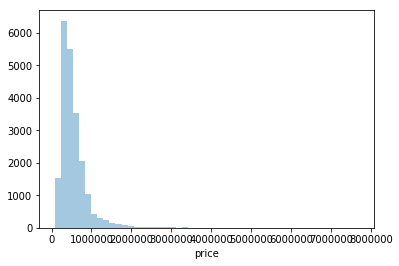

In [214]:
sns.distplot(df['price'],kde=False)

Here we cant read the text in x axis , so to make it clear, we have done following

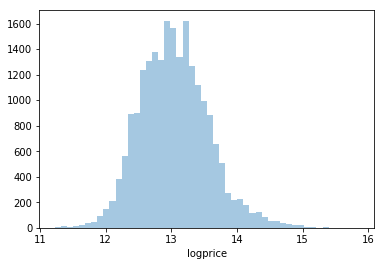

In [215]:
df['logprice']=np.log(df['price'])
sns.distplot(df["logprice"],kde=False)

we can do it also like following

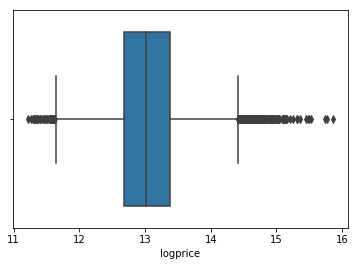

In [218]:
sns.boxplot(df['logprice'])

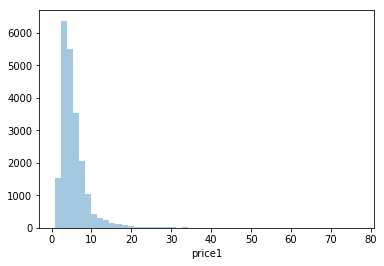

In [219]:
df['price1']=df['price']/100000
sns.distplot(df['price1'],kde=False)

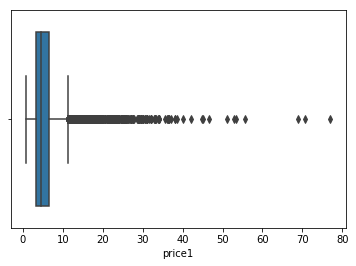

In [220]:
sns.boxplot(df['price1'])

Now we can deduce that from above plots that 

Median House price= $450,000.

The most expensive house cost $7.7 million

###Second Variable is *bedrooms*

In [207]:
df[['bedrooms']].describe()


,bedrooms
count,21613.000000
mean,3.370842
std,0.930062
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,33.000000


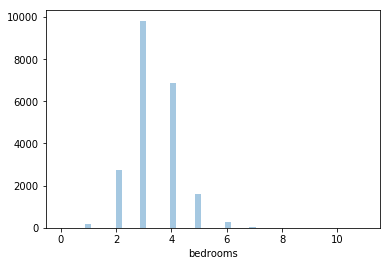

In [0]:
sns.distplot(df['bedrooms'],kde=False)

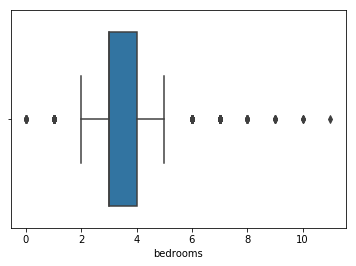

In [0]:
sns.boxplot(df['bedrooms'])

We can deduce that 

Median bedrooms=3

Max bedrooms=11

###Third Variable is *bathrooms* 

In [0]:
df['bathrooms'].describe()

count    21612.000000
mean         2.114855
std          0.770047
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

Here we see that there are bathrooms like 1.75 and 2.25

Thats not possible but

In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower [2] and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". This lack of a single, universal definition commonly results in discrepancies between advertised and actual number of baths in real estate listings. An additional complication is that there are currently two ways of notating the number of bathrooms in a dwelling. One method is to count a half bathroom as ".5" and then add this to the number of full bathrooms (e.g., "2.5" baths would mean 2 full baths and 1 half bath). The other, newer method is to put the number of full bathrooms to the left side of the decimal point and to put the number of half bathrooms to the right of the decimal point (e.g., "2.1" would mean 2 full baths and 1 half bath; "3.2" would mean 3 full baths and 2 half baths).

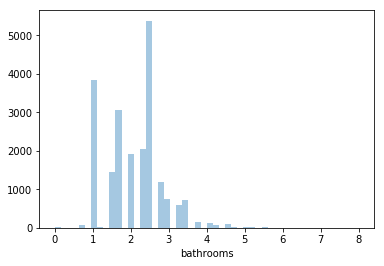

In [0]:
sns.distplot(df['bathrooms'],kde=False)

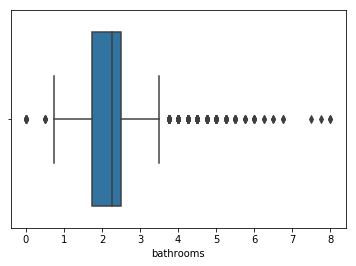

In [0]:
sns.boxplot(df['bathrooms'])

We can deduce that 

Median bathrooms=2.5

Max bathrooms=8

Min bathroom=1

###Fourth Variable *sqft_living*

In [0]:
df["sqft_living"].describe()

count    21612.000000
mean      2079.982556
std        918.381436
min        370.000000
25%       1429.250000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

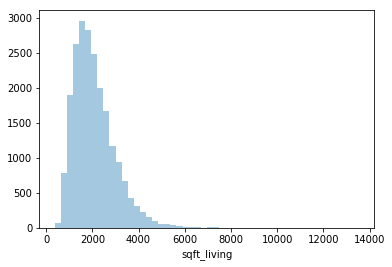

In [0]:
sns.distplot(df['sqft_living'],kde=False)

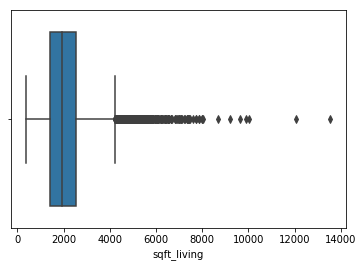

In [0]:
sns.boxplot(df['sqft_living'])

We can deduce that 

Median sqft_living=1910 square feet

Max sqft_living=13540 square feet

Min sqft_living=370 square feet

###Fifth Variable *sqft_lot*

In [0]:
df["sqft_lot"].describe()

count    2.161200e+04
mean     1.510670e+04
std      4.142145e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.617500e+03
75%      1.068725e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

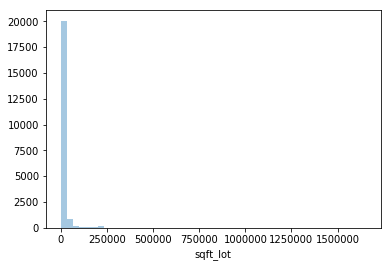

In [0]:
sns.distplot(df['sqft_lot'],kde=False)

We cant clearly see the X axis values for most of the Variable

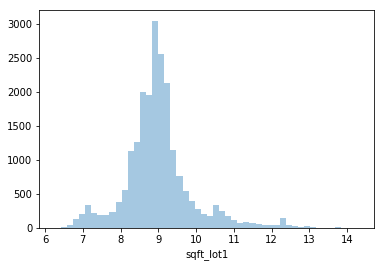

In [0]:
df['sqft_lot1']=np.log(df['sqft_lot'])
sns.distplot(df["sqft_lot1"],kde=False)

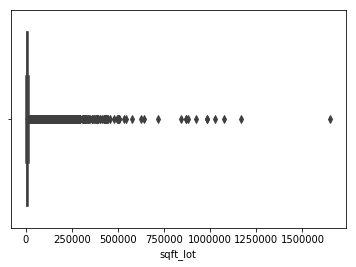

In [0]:
sns.boxplot(df['sqft_lot'])

We cant even read box plot.To make it readable  



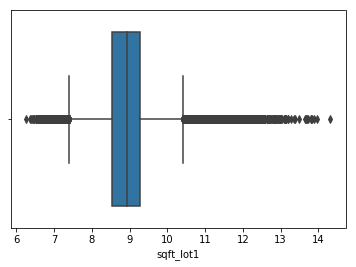

In [0]:
sns.boxplot(df['sqft_lot1'])

We can deduce that

Median sqft_lot=7618 square feet

Max sqft_lot=1651359 square feet

Min sqft_lot=520 square feet

###Sixth Variable *floors*

In [0]:
df['floors'].describe()

count    21612.000000
mean         1.494332
std          0.539991
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

How Floors can be in decimal

This is Possible by **FAR** -: Floor area ratio
![alt text](https://seattleslandusecode.files.wordpress.com/2011/03/far-diagram.jpg)

1.5 story homes are as tall as 2-story homes, but the master bedroom and primary living spaces are usually located on the main floor while other bedrooms, storage rooms and/or guest rooms can be located upstairs.

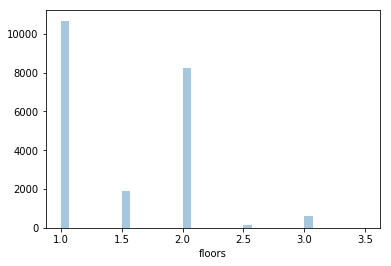

In [0]:
sns.distplot(df['floors'],kde=False)

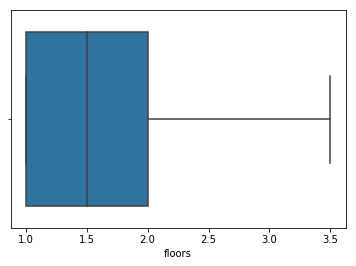

In [0]:
sns.boxplot(df['floors'])

We can deduce that

Median floors=1.5

Max floors=3.5

Min floors=1.0

###Seventh Variable *waterfront*

In [0]:
df['waterfront'].sum()

163

Total 163 Houses has waterfront view

###Eighth Variable *view*

In [0]:
df['view'].describe()

count    21612.000000
mean         0.234314
std          0.766334
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

Minimum times a house viewed is 0 

Maximum times a house viewed is 4

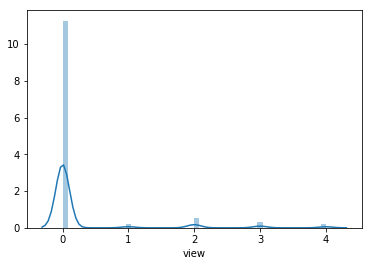

In [0]:
sns.distplot(df["view"])

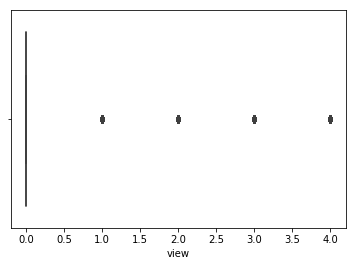

In [0]:
sns.boxplot(df["view"])

These both Graphs dont give us any clarity

In [0]:
df.query('view==0').count()

id               19488
date             19488
price            19488
bedrooms         19488
bathrooms        19488
sqft_living      19488
sqft_lot         19488
floors           19488
waterfront       19488
view             19488
condition        19488
grade            19488
sqft_above       19488
sqft_basement    19488
yr_built         19488
yr_renovated     19488
zipcode          19488
lat              19488
long             19488
sqft_living15    19488
sqft_lot15       19488
logprice         19488
price1           19488
sqft_lot1        19488
dtype: int64

In [0]:
df.query('view==1').count()

id               332
date             332
price            332
bedrooms         332
bathrooms        332
sqft_living      332
sqft_lot         332
floors           332
waterfront       332
view             332
condition        332
grade            332
sqft_above       332
sqft_basement    332
yr_built         332
yr_renovated     332
zipcode          332
lat              332
long             332
sqft_living15    332
sqft_lot15       332
logprice         332
price1           332
sqft_lot1        332
dtype: int64

In [0]:
df.query('view==2').count()

id               963
date             963
price            963
bedrooms         963
bathrooms        963
sqft_living      963
sqft_lot         963
floors           963
waterfront       963
view             963
condition        963
grade            963
sqft_above       963
sqft_basement    963
yr_built         963
yr_renovated     963
zipcode          963
lat              963
long             963
sqft_living15    963
sqft_lot15       963
logprice         963
price1           963
sqft_lot1        963
dtype: int64

In [0]:
df.query('view==3').count()

id               510
date             510
price            510
bedrooms         510
bathrooms        510
sqft_living      510
sqft_lot         510
floors           510
waterfront       510
view             510
condition        510
grade            510
sqft_above       510
sqft_basement    510
yr_built         510
yr_renovated     510
zipcode          510
lat              510
long             510
sqft_living15    510
sqft_lot15       510
logprice         510
price1           510
sqft_lot1        510
dtype: int64

In [0]:
df.query('view==4').count()

id               319
date             319
price            319
bedrooms         319
bathrooms        319
sqft_living      319
sqft_lot         319
floors           319
waterfront       319
view             319
condition        319
grade            319
sqft_above       319
sqft_basement    319
yr_built         319
yr_renovated     319
zipcode          319
lat              319
long             319
sqft_living15    319
sqft_lot15       319
logprice         319
price1           319
sqft_lot1        319
dtype: int64

No. of houses viewed 0 times = 19488

No. of houses viewed 1times = 332

No. of houses viewed 2times = 963

No. of houses viewed 4times = 510

No. of houses viewed 3times = 319

###Ninth Variable *condition*

In [0]:
df["condition"].describe()

count    21612.000000
mean         3.409541
std          0.650552
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

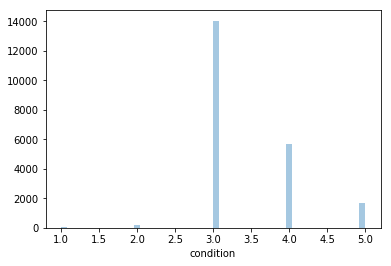

In [0]:
sns.distplot(df["condition"],kde=False)

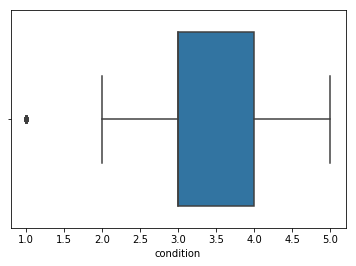

In [0]:
sns.boxplot(df['condition'])

Condition is Between 1-5

Average Condition of houses is 3

###Tenth Variable *grade*

In [0]:
df['grade'].describe()

count    21612.000000
mean         7.657181
std          1.174613
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

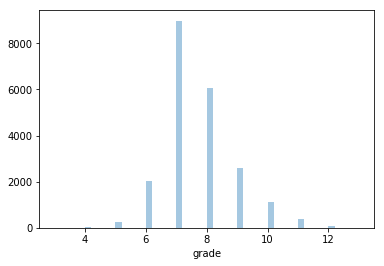

In [0]:
sns.distplot(df['grade'],kde=False)

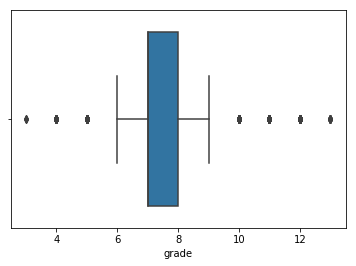

In [0]:
sns.boxplot(df['grade'])

Grading is from 3-13

Average House Grading is 8

###Eleventh Variable *sqft_above*

In [0]:
df["sqft_above"].describe()

count    21612.000000
mean      1788.460022
std        828.047404
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [0]:
df["sqft_living"].describe()

count    21612.000000
mean      2079.982556
std        918.381436
min        370.000000
25%       1429.250000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [0]:
df["sqft_basement"].describe()

count    21612.000000
mean       291.522534
std        442.580840
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

By seeing all Three , We can say that 

**sqft_living = sqft_above + sqft_basement**

Hence sqft_above is a useless quantity.


###Twelfth Variable *sqft_basement*

In [0]:
df['sqft_basement'].describe()

count    21612.000000
mean       291.522534
std        442.580840
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

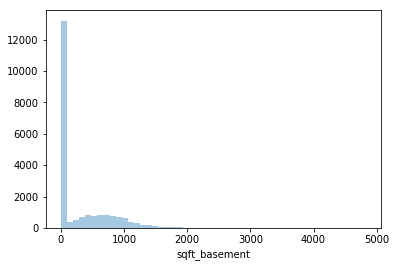

In [0]:
sns.distplot(df['sqft_basement'],kde=False)

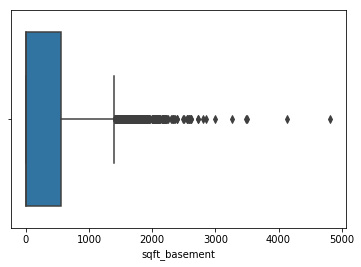

In [164]:
sns.boxplot(df['sqft_basement'])

Box plot is not good  enough for this case

In [163]:
df.query('sqft_basement==0').count()

id               13126
date             13126
price            13126
bedrooms         13126
bathrooms        13126
sqft_living      13126
sqft_lot         13126
floors           13126
waterfront       13126
view             13126
condition        13126
grade            13126
sqft_above       13126
sqft_basement    13126
yr_built         13126
yr_renovated     13126
zipcode          13126
lat              13126
long             13126
sqft_living15    13126
sqft_lot15       13126
dtype: int64

13126 Houses doesnt have basements 


###Thirteenth Variable *yr_built*

In [168]:
df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [183]:
df.query("yr_built==1900").count()

id               87
date             87
price            87
bedrooms         87
bathrooms        87
sqft_living      87
sqft_lot         87
floors           87
waterfront       87
view             87
condition        87
grade            87
sqft_above       87
sqft_basement    87
yr_built         87
yr_renovated     87
zipcode          87
lat              87
long             87
sqft_living15    87
sqft_lot15       87
dtype: int64

87 Houses were Built in 1900

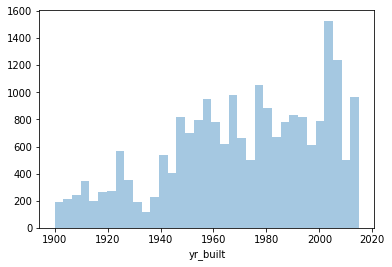

In [169]:
sns.distplot(df['yr_built'],kde=False)

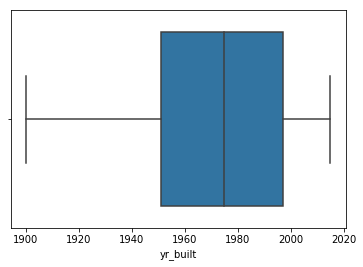

In [170]:
sns.boxplot(df['yr_built'])

Oldest Houses were bulit in *1900*

###Fourteenth Variable *yr_renovated*

In [171]:
df['yr_renovated'].describe()

count    21613.000000
mean        84.402258
std        401.679240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

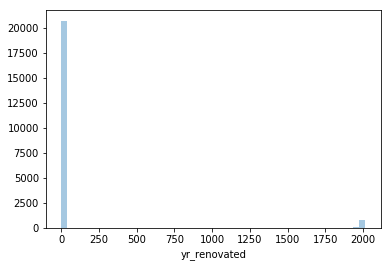

In [172]:
sns.distplot(df['yr_renovated'],kde=False)

No need of graphs here


In [175]:
df.query("yr_renovated==0").count()

id               20699
date             20699
price            20699
bedrooms         20699
bathrooms        20699
sqft_living      20699
sqft_lot         20699
floors           20699
waterfront       20699
view             20699
condition        20699
grade            20699
sqft_above       20699
sqft_basement    20699
yr_built         20699
yr_renovated     20699
zipcode          20699
lat              20699
long             20699
sqft_living15    20699
sqft_lot15       20699
dtype: int64

20699 Houses were not renovated

In [186]:
df.query("yr_built==1900 and yr_renovated == 0").count()

id               68
date             68
price            68
bedrooms         68
bathrooms        68
sqft_living      68
sqft_lot         68
floors           68
waterfront       68
view             68
condition        68
grade            68
sqft_above       68
sqft_basement    68
yr_built         68
yr_renovated     68
zipcode          68
lat              68
long             68
sqft_living15    68
sqft_lot15       68
dtype: int64

68 houses that were built in 1900 were never renovated

###Fifteenth Variable *zipcode*

In [199]:
df[['zipcode']].describe()

,zipcode
count,21613.000000
mean,98077.939805
std,53.505026
min,98001.000000
25%,98033.000000
50%,98065.000000
75%,98118.000000
max,98199.000000


Describe Function doesnt have any meaning for zipcodes

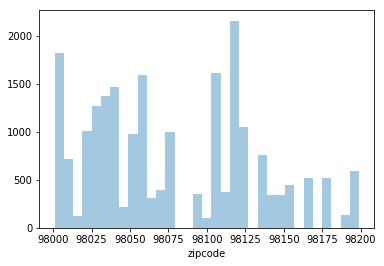

In [193]:
sns.distplot(df['zipcode'],kde=False)

In [194]:
df['zipcode'].nunique()

70

70 Different cities are in King County, USA

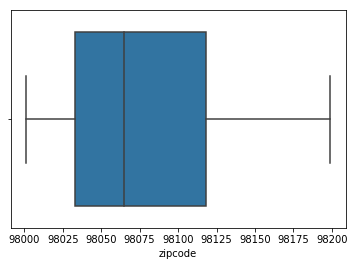

In [195]:
sns.boxplot(df['zipcode'])

Most Houses that were sold lies in 98025 - 98125 zipcodes.

###Sixteenth and Seventeenth Variables *lat* and *long*

These will be shown combined in Bivariate Analysis

###Eighteenth and Nineteenth Variable *sqft_living15* and	*sqft_lot15*

In [200]:
df[['sqft_living','sqft_living15']].describe()

,sqft_living,sqft_living15
count,21613.000000,21613.000000
mean,2079.899736,1986.552492
std,918.440897,685.391304
min,290.000000,399.000000
25%,1427.000000,1490.000000
50%,1910.000000,1840.000000
75%,2550.000000,2360.000000
max,13540.000000,6210.000000


In [201]:
df[['sqft_lot','sqft_lot15']].describe()

,sqft_lot,sqft_lot15
count,2.161300e+04,21613.000000
mean,1.510697e+04,12768.455652
std,4.142051e+04,27304.179631
min,5.200000e+02,651.000000
25%,5.040000e+03,5100.000000
50%,7.618000e+03,7620.000000
75%,1.068800e+04,10083.000000
max,1.651359e+06,871200.000000


These are almost similar to sqft_living and sqft_lot

###Conclusion - For Price prediction we should consider following parametres

1. bedrooms
2. bathrooms
3. sqft_living
4. sqft_lot
5. floors
6. waterfront
7. condition
8. grade
9. yr_built
10. yr_renovated


#Bivariate Analysis